# Part II - Ford GoBike System Data Presentation
## by Samuel Shaibu

## Investigation Overview

> In the San Francisco Bay Area of California, there is a regional public bike sharing program called Bay Wheels (formerly Ford GoBike). With approximately 500,000 rides since its debut in 2017, Bay Wheels is the first regional and extensive bicycle sharing system set up in California and along the West Coast of the United States. As of January 2018, it has about 10,000 annual subscribers. The monthly individual trip data for the broader San Francisco Bay area in CSV format from January 2018 to December 2018 comprise the dataset used for this exploratory investigation.




## Dataset Overview

>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# To load in the dataset into a pandas dataframe

df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')



In [3]:
# To make some some cleaning and transformation on the data types

df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])
df_ford['end_time'] = pd.to_datetime(df_ford['end_time'])

df_ford['start_station_id'] = df_ford['start_station_id'].astype('str')
df_ford['end_station_id'] = df_ford['end_station_id'].astype('str')
df_ford['bike_id'] = df_ford['bike_id'].astype('str')

df_ford['user_type'] = df_ford['user_type'].astype('category')
df_ford['member_gender'] = df_ford['member_gender'].astype('category')

In [7]:
# To add new columns as duration in minutes and start_time to yyyy-mm-dd format and other transformations

df_ford['duration_minute'] = df_ford['duration_sec']/60
df_ford['start_date'] = df_ford.start_time.dt.strftime('%y-%m-%d')
df_ford['start_date_hour'] = df_ford.start_time.dt.strftime('%H')
df_ford['start_date_day'] = df_ford.start_time.dt.strftime('%A')
df_ford['start_date_month'] = df_ford.start_time.dt.strftime('%B')

In [8]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# To make weekday categorical data types

weekday_cate = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
df_ford['start_date_day'] = df_ford['start_date_day'].astype(weekday_cate)

In [9]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# To make start_month categprical data types

month_cate = pd.api.types.CategoricalDtype(ordered = True, categories = month)
df_ford['start_date_month'] = df_ford['start_date_month'].astype(month_cate)

## Distribution of Trip Duration in minutes

> This histogram visual was built using the `df_ford` dataframe and utilizing the `duration_minute` as the x axis. From the plot, you will observe that the visual is skewed to the right with the trip duration having the highest distribution between 5 to 10 minutes.

Text(0.5, 1.0, 'Distribution of Trip Duration')

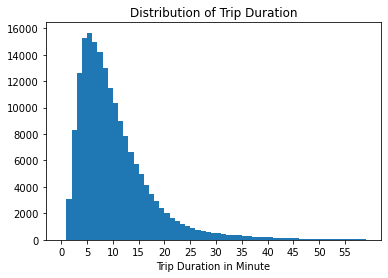

In [11]:
bins = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data = df_ford, x = 'duration_minute', bins = bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');
plt.title('Distribution of Trip Duration')

## Distribution of Trip Duration during weekdays for Customers and Subscribers

> From the multivariate visual below, you can deduce that subscribers trips were much shorter and quick as compared to customers for weekdays. However, the length of trips for both user types increased noticeably on Saturdays and Sundays, notably for casual customers. Overall, subscribers usage was more productive than customers usage and had a very stable average length during weekdays.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

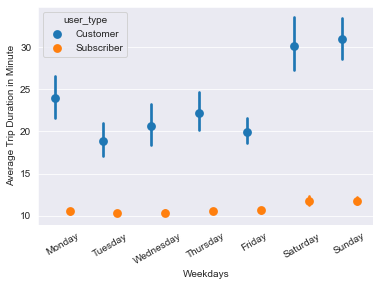

In [20]:
sb.pointplot(data = df_ford, x = 'start_date_day', y = 'duration_minute', hue = 'user_type', dodge = 0.3, linestyles = "");
plt.xlabel('Weekdays');
plt.ylabel('Average Trip Duration in Minute');
plt.xticks(rotation = 30)

## Analysis of the Varying Hourly Usage During Weekdays for Customers and Subscribers

> It is obvious that the two types of riders have different usage patterns and behaviors.On weekdays, subscribers made heavy use of the system, although weekends record high rides, especially in the afternoon. When utilized for commuting to work, subscribers made a lot of journeys between 8 and 9 am and 17 to 18 pm on weekdays. However, customers tended to make more excursions between 17 and 18 pm during weekdays. In addition to the various usage objectives, it could also be related to the local traffic conditions during these rush hours.



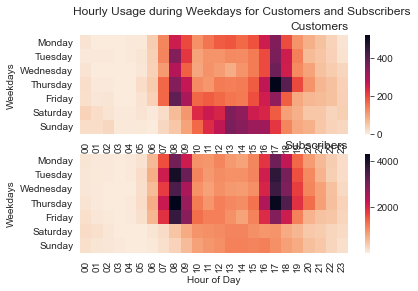

In [21]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df_ford.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_date_day', 'start_date_hour']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_date_day', columns = 'start_date_hour', values = 'count')
sb.heatmap(ct_counts, cmap = 'rocket_r');
plt.title('Customers', loc = 'right');
plt.xlabel('Hour of Day');
plt.ylabel('Weekdays');

plt.subplot(2, 1, 2)
subscribers = df_ford.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_date_day', 'start_date_hour']).size()
st_counts = st_counts.reset_index(name = 'count')
st_counts = st_counts.pivot(index = 'start_date_day', columns = 'start_date_hour', values = 'count')
sb.heatmap(st_counts, cmap = 'rocket_r');
plt.title('Subscribers', loc = 'right');
plt.xlabel('Hour of Day');
plt.ylabel('Weekdays');

In [1]:
!jupyter nbconvert <Part_II_slide_deck_ford>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.
